## import statsmodels.formula.api as smf
import statsmodels.api as sm

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

(오차가 커지면 t값을 작아짐, 편차가 커지면 t값이 커짐 
t값이 크면 유의미한 차이가 있다고 판단) 

(p값이 작으면 귀무가설이 틀릴 가능성이 커짐 
p값이 작을수록 모순 )


- 통계적 가설검정은 표본을 사용해서 모집단에 대한 통계적인 판단을 내리는 방법
- 판단의 기준으로 통계적인 표현을 사용하며 간단히 검정이라고 부름
- 평균값의 차이만으로 유의미한 차이를 얻을 수 없으며 샘플사이즈와 데이터의 흩어짐 크기를 가미하는 것이 필요
- 1변량 데이터의 t검정
    - 샘플사이즈가 크고 데이터의 분산이 작고 평균값의 차이가 크다는 세가지 조건을 만족하는 지표를 t값이라고 함
    - t값 = (표본평균 - 모평균) / 표준오차
    - t값이 크면 유의미한 차이가 있다고 판단
- 귀무가설 대립가설
    - 기각 대상이 되는 첫번째 가설을 귀무가설, 귀무가설과 대립되는 가설을 대립가설이라고 함
    - 귀무가설이 기각된다면 즉 귀무가설이 틀렸다고 판단을 하면 유의미한 차이가 있다는 것임
- p값(유의확률): 표본과 귀무가설 간의 모순을 나타내는 지표
    - p값이 작을수록 귀무가설과 표본이 모순된다고 판단
- 유의수준: 귀무가설을 기각하는 기준이 되는 값
    - 유의수준은 위험률이라고 하며 5%를 사용하는 경우가 많음.


In [7]:
# t검정 : 귀무가설 >>과자의 무게는 50g이다. 
import pandas as pd
junk_food = pd.read_csv('dataset/5_8_jfw.csv')
junk_food.head()

jfood= junk_food.weight
jfood.head()

0    58.529820
1    52.353039
2    74.446169
3    52.983263
4    55.876879
Name: weight, dtype: float64

In [8]:
# 표본평균
import numpy as np
mu= np.mean(jfood)
mu

55.38496619666667

In [9]:
# 자유도
df= len(jfood)-1
df

19

In [10]:
# 표준오차
sigma= np.std(jfood,ddof=1)
se= sigma/np.sqrt(len(jfood))
se

1.9579276805755885

In [11]:
# t값: (표본평균- 모평균) / 표준오차 
t_value= (mu-50)/se
t_value

2.7503396831713434

In [12]:
# p값(유의확률)이 유의수준 0.05보다 작으면 귀무가설 기각 
from scipy import stats
alpha = stats.t.cdf(t_value,df=df)
( 1- alpha ) * 2


# alpha 중간에 있는 확률 , 양측검정이니까 *2 

0.012725590012524268

In [13]:
# >> 대립가설!! (귀무가설 기각) :: ~의 무게는 50그람이 아니다 

In [14]:
# t검정 : t값,p값
# p 값(유의확률)이 유의수준 0.05보다 작으므로 귀무가설 기각 
# '과자의 무게는 50g이 아니다'라고 할 수 있다.

stats.ttest_1samp(jfood,50)

Ttest_1sampResult(statistic=2.750339683171343, pvalue=0.012725590012524182)

- 대응표본 t검정 : 약을 먹기 전과 후의 체온의 차이를 보는 경우 사요
- 독립표본 t검정 : 큰 바늘로 낚은 물고기의 길이와 작은 바늘로 낚은 물고기의 길이의 차이를 보는 경우 사용. welch 근사법이라고 불리는 방법을 이용하여 p값 계산(welch검정)

:: 약의 효과 검정

In [15]:
pt_data= pd.read_csv('dataset/5_9_ptt.csv')
pt_data

,person,medicine,body_temperature
0,A,before,36.2
1,B,before,36.2
2,C,before,35.3
3,D,before,36.1
4,E,before,36.1
5,A,after,36.8
6,B,after,36.1
7,C,after,36.8
8,D,after,37.1
9,E,after,36.9


In [16]:
# 대응표본 t검정
before= pt_data.query('medicine=="before"')['body_temperature']
after= pt_data.query('medicine=="after"')['body_temperature']

# 배열로 변환 
before = np.array(before)
after = np.array(after)
diff= after - before 
diff

array([ 0.6, -0.1,  1.5,  1. ,  0.8])

In [17]:
# 평균값이 0과 다른지 검정
# 귀무가설을 기각하므로 유의미한 차이가 있다고 주장할 수 있다.
stats.ttest_1samp(diff,0)

Ttest_1sampResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

In [18]:
# 독립표본 t검정
# (약을 먹지않은 집단과 약을 먹은 집단을 별도의 독립적인 표본으로 본다... )

# 평균치
mean_bf= np.mean(before)
mean_af= np.mean(after)

# 분산
sigma_bf= np.var(before,ddof=1)
sigma_af= np.var(after, ddof=1)

# 샘플사이즈
m= len(before)
n= len(after)

# t값
t_value= (mean_af-mean_bf)/ np.sqrt((sigma_bf/m + sigma_af/n))
t_value

3.1557282344421034

In [19]:
# equal_var = False : 분산이 다르다고 가정한 t검정 >> welch 검정
stats.ttest_ind(after,before,equal_var=False) 

# 귀무가설을 기각하고 유의미한 차이가 있다고 판단

Ttest_indResult(statistic=3.1557282344421034, pvalue=0.013484775682079892)

In [20]:
# 카이제곱 검정 : 독립성 검정의 분할표 및 가설 설정
# 귀무가설 : 두 범주형 변수 사이에 연관이 없다. (독립이다)
# 대립가설 : 두 범주형 변수 사이에 연관이 있다. (종속이다)

click_data = pd.read_csv('dataset/5_10_cd.csv')
click_data

,color,click,freq
0,blue,click,20
1,blue,not,230
2,red,click,10
3,red,not,40


In [21]:
# 분할표
cross= pd.pivot_table(data=click_data, values='freq',
                     aggfunc='sum',index='color',columns='click')
cross

click,click,not
color,,
blue,20,230
red,10,40


In [22]:
# 카이스퀘어 통계량, p값, 자유도, 기대도수표
# 카이스퀘어 검정시 기대도수가 전부 5이상이어야 함
# p값이 0.05보다 작으므로 색에 따라 버튼을 클릭하는 것이 유의미하게 변한다고 판단

stats.chi2_contingency(cross,correction=False)

                      
                      
# correction=False : 보정을 안하겠다

(6.666666666666666,
 0.009823274507519247,
 1,
 array([[ 25., 225.],
        [  5.,  45.]]))

- 카이제곱 겁정(chi-squared test)또는 X2 검정은 카이제곱 분포에 기초한 통계적 방법으로, 관찰된 빈도가 기대 빈도와 통계적으로 다른지를 판단하는 검증방법임.
- 카이제곱 검정에는 독립성 검정, 동질성 검정 등이 있음.
- 독립성 검정과 동질성 검정은 분할표와 가설 설정 부분만 다르며 검정 수행방법은 동일한 과정으로 진행됨.
- 독립성 검정은 하나의 모집단에서 표본추출하며 동질성 검정은 두 개 이상의 모집단에서 표본 추출하여 분할표를 만듦.
- [독립성 검정 사례] 어느 병원에서 진료를 받은 환자의 나이와 진찰받은 부위를 구분하여 작성한 분할표이다. 나이와 진찰받은 부위가 서로 관계가 있는지 유의수준 5%에서 검정.
- [동질성 검정 사례] 세 가지 토양의 종류(진흙,모래,로움)에 따른 새로운 잡종 식물의 성장상태를 알기 위해 진흙 65군데, 모래 60군데, 로움 60군데를 대상으로 실험을 행하여 다음과 같은 분할표를 작성하였다. 토양의 종류에 따라 식물의 성장상태가 다르다고 할 수 있는 지를 유의수준 5%에서 검정

[과제]
Q. "Data/5_2_shoes.csv" 을 데이터프레임으로 불러와서 아래작업을 수행하세요
- 4행 3열을 복사하여 수직으로 결합하여 8행 3열의 데이터프레임 df로 만드세요
- 교차분석표를 만드세요( values = 'sales', aggfunc='sum',index='store',columns ='color')
- 독립성 검정을 수행하세요

In [23]:
sh= pd.read_csv('dataset/5_2_shoes.csv')

sh2= pd.concat([sh,sh],axis=0)
sh2

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [24]:
dd= pd.pivot_table( sh2, values = 'sales', aggfunc='sum',index='store',columns ='color')
dd

color,blue,red
store,,
osaka,26,18
tokyo,20,30


수리모델 : 현상을 수식으로 표현한 모델. 맥주 매상 = 20 + 4 * 기온
- 확률모델 : 확률적인 표현이 있는 모델. 확률분포를 사용. 맥주 매상 ~ N(20F4 기온, 시그마2). 맥주 매상은 20+4기온+e, 오차e ~ N(0,시그마2)를 따른다. 맥주 매상은 20+4*기온에 대해 (오차의?) 평균이 0, 분산이 시그마2인 정규분포를 따르며 노이즈가 있다는 의미

- 통계모델 : 데이터에 적합하게 구축된 모델. 맥주 매상 ~N(10+5* 기온,시그마2) 확률모델의 구조를 생각하면서 데이터에 적합하게 파라미터를 조정해가며 통계모델을 구축

- 확률분포와 통계모델 : 모집단에서 랜덤 샘플링을 하여 표본을 얻는 행동은 모집단 분포를 따 르는 난수를 발생시키는 것과 같다. 통계모델을 사용하면 확률분포의 모수(파라미터)의 변화 패턴을 명확히 할 수 있다.즉 언급한 모델은 '기온이 올라가면 맥주 매상의 평균값이 증가한 다'와 같은 구조라는 것을 알 수 있다.통계모델에 의한 예측은 기온이라는 독립변수를 얻는 것 이 조건인 매상의 확률분포 즉 조건부 확류분포의 형태로 얻을 수 있으며 예측값의 대표값은 조건부 기댓값을 사용한다. 기온이 10도C일 때의 매상 예측은 기댓값이 60,분산이 시그마2인 정규분포를 따르는 매상 데이터를 얻을 것이라는 주장이 된다.

- 모델링에 초점 : 날씨와 세일이라는 2가지 영향을 동시에 평가하는 통계모델을 만든다면 더욱 올바른 효과를 분석할 수 있다. 통계모델은 잠정적인 세계의 모형으로 · 통계모델을 구축 시 파라미터의 추정을 틀리게 하면 올바른 해석을 할 수 없다.
- 분석에 사용하는 데이터에 문제가 있는 경우도 올바른 모델을 만들 수 없다. 
- 통계모델에 사용되는 파라미터를 계수라고 하는 반면 머신러닝에서는 가중치라고 표현

(기온이 not random 이라서 정규분포를 따르지 않고, 오차항 e의 분포가 N(0, 𝜎2) 를 따른다고 봐야할듯...)

In [25]:
!pip install statsmodels

In [26]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

beer = pd.read_csv('dataset/7_1_beer.csv')
beer.head()

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8


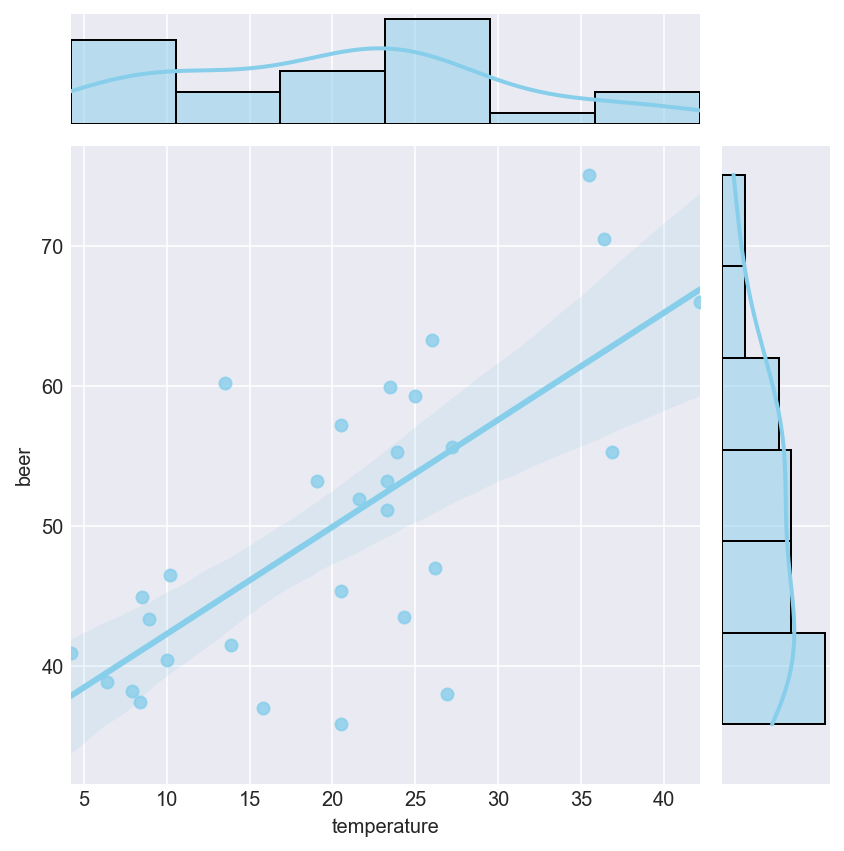

In [27]:
sns.jointplot(x='temperature', y='beer', kind='reg',
              data=beer,color='skyblue')

In [28]:
lm_model = smf.ols(formula="beer ~ temperature",
                  data=beer).fit()

In [29]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           1.11e-05
Time:                        10:26:20   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# [과제]
# Q. 선형 모델을 생성하고 summary를 출력한 후 모델에 대한 통계지표들을 해석하세요
df= pd.read_csv('dataset/auto-mpg.csv')
df_mw =df[['mpg','weight']]
df_mw.head()

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449


In [31]:
lm_model2 = smf.ols(formula="mpg ~ weight",
                  data=df_mw).fit()

In [32]:
lm_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Wed, 18 Aug 2021   Prob (F-statistic):          2.97e-103
Time:                        10:26:22   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3174      0.795     58.243      0.000      44.754      47.881
weight        -0.0077      0.000    -29.814      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

No. Observations : 분석에 사용한 398개의 데이터쌍 ,관찰개수
Df Residuals : 잔차의 자유도 398 - 2(파라미터 수) = 396
Df Model : 1개의 독립변수 (파라미터)
R-squared : 0.4 이상이면 유의미한데 0.692이므로 선형모형이 적합하다고 볼 수 있음. (유의미하다)
Adj. R-squared : 모델에 도움에 되는 데이터에 따라 조정된 R-squared
F-statistic : 도출된 회기식은 적절하지 않다 ( 0에 가까울수록 적절인데 888이 나옴)
Prob (F-statistic) : 회귀식이 얼마나 유의미한가... (0.05 이하일경우 변수끼리 관련)
 --> 2.97e-103:: 유의미하다 

In [33]:
null_model = smf.ols('beer ~ 1', data=beer).fit()
null_model.aic

227.94194972563105

In [34]:
lm_model = smf.ols('beer ~ temperature', data= beer).fit()
lm_model.aic

208.9090293557544

In [35]:
lm_model.predict(pd)

TypeError: object of type 'module' has no len()

In [36]:
# 기온이 0도일 때 맥주 매상의 기댓값
lm_model.predict(pd.DataFrame({'temperature':[0]}))

0    34.610215
dtype: float64

In [37]:
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [38]:
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20
print("수식", beta0 + beta1 * temperature)
print("20도일때", lm_model.predict(pd.DataFrame({'temperature':[20]})))

수식 49.91876701095053
20도일때 0    49.918767
dtype: float64


In [39]:
# 잔차계산 
resid= lm_model.resid
resid.head()

0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64

In [40]:
# 잔차= 실제값 - 예측값 
y_hat= beta0 + beta1*temperature 
(beer.beer - y_hat).head()

0    -4.618767
1     9.381233
2    -9.518767
3   -11.918767
4   -12.918767
Name: beer, dtype: float64

In [41]:
#결정계수 R.squared
mu = np.mean(beer.beer)
y = beer.beer
y_hat = lm_model.predict()

np.sum((y_hat - mu) ** 2) / np.sum((y - mu) ** 2)

0.5039593230611877

In [42]:
#수정 결정계수 adj.R.squared
#독립변수의 수가 증가하면 결정계수가 커지는 경향을 조정하기 위해 독립변수가 늘어나는 것에 대하여 퍠널티를 부여
n = len(beer.beer)
s = 1 # 독립변수의 수
1 - ((np.sum(resid ** 2) / (n-s-1)) /(np.sum((y-mu) ** 2) / (n-1)))  

0.48624358459908534

In [43]:
lm_model.rsquared_adj

0.4862435845990851

In [44]:
# 종속변수의 변동 크기는 모델로 설명 가능한 변동과
# 설명 못하는 잔차제곱합으로 분해할 수 있다.
np.sum((y-mu)**2)

3277.1146666666664

In [45]:
np.sum ( (y_hat-mu) ** 2)  +  sum(resid **2 )  
#모델이 설명 가능한 부분 + 모델이 설명하지 못하는 잔차의 제곱 합

3277.1146666666723

<AxesSubplot:ylabel='Count'>

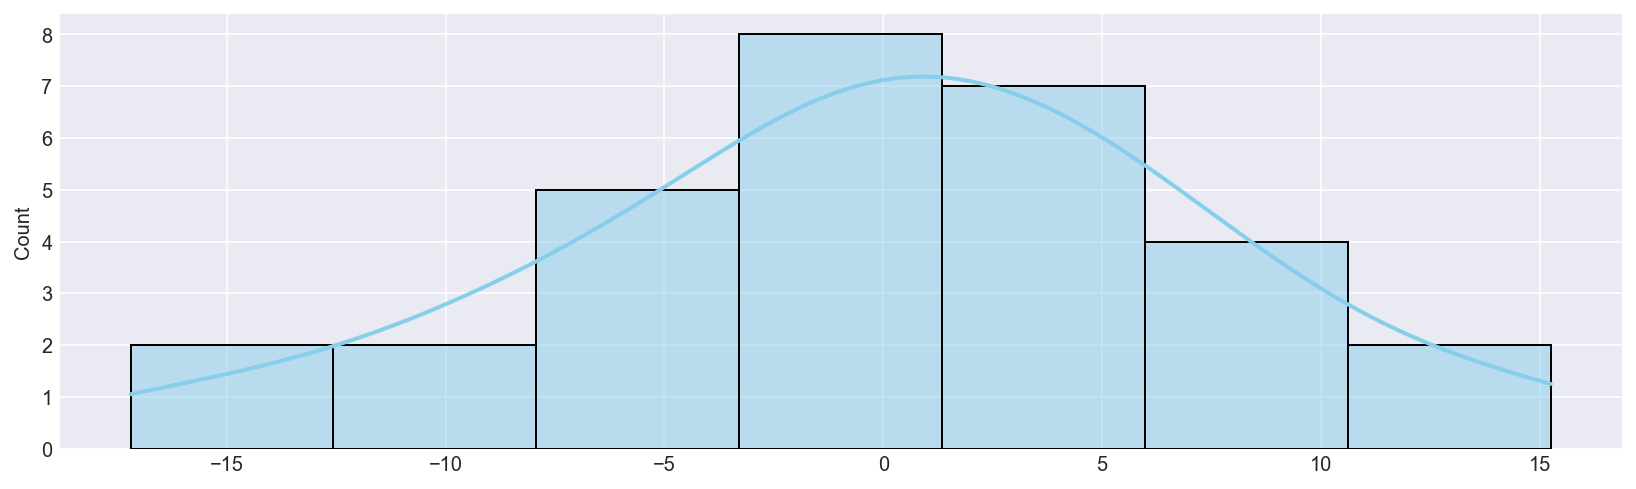

In [46]:
# 잔차 그래프
sns.histplot(resid,color='skyblue',kde=True)

<AxesSubplot:ylabel='Density'>

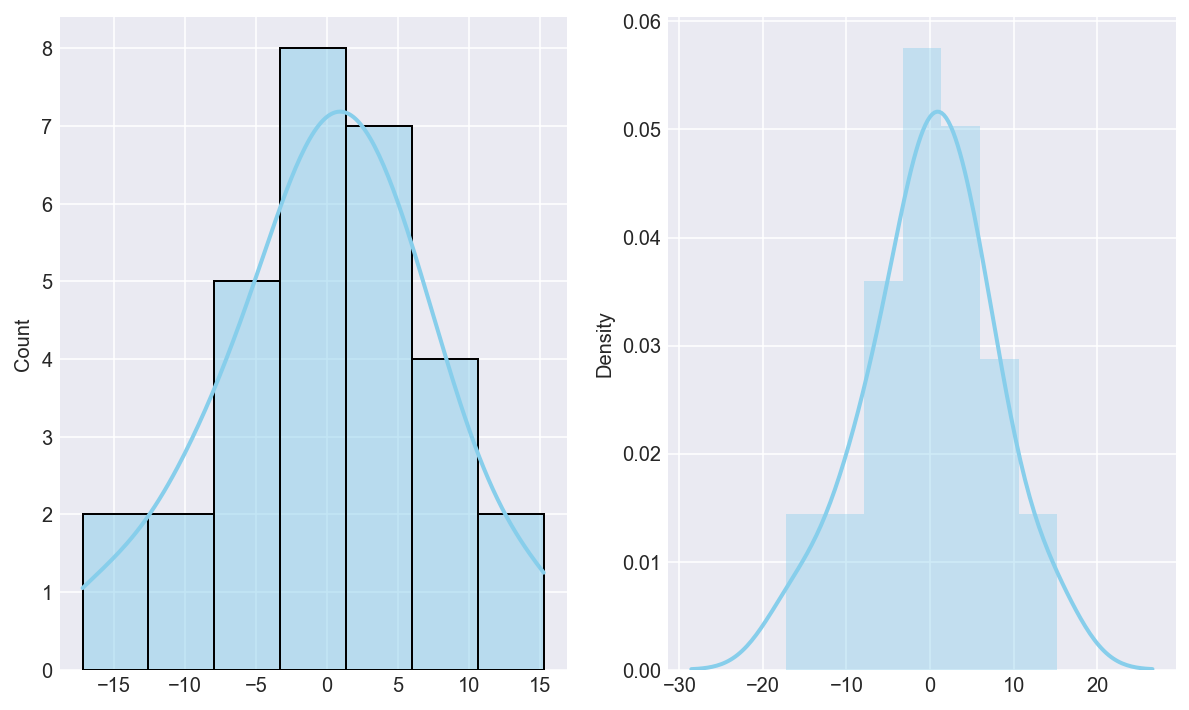

In [47]:
import warnings
warnings.filterwarnings('ignore')
fig= plt.figure(figsize=(10,6))
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
sns.histplot(resid,color='skyblue',kde=True, ax=ax1)
sns.distplot(resid,color='skyblue', ax=ax2)

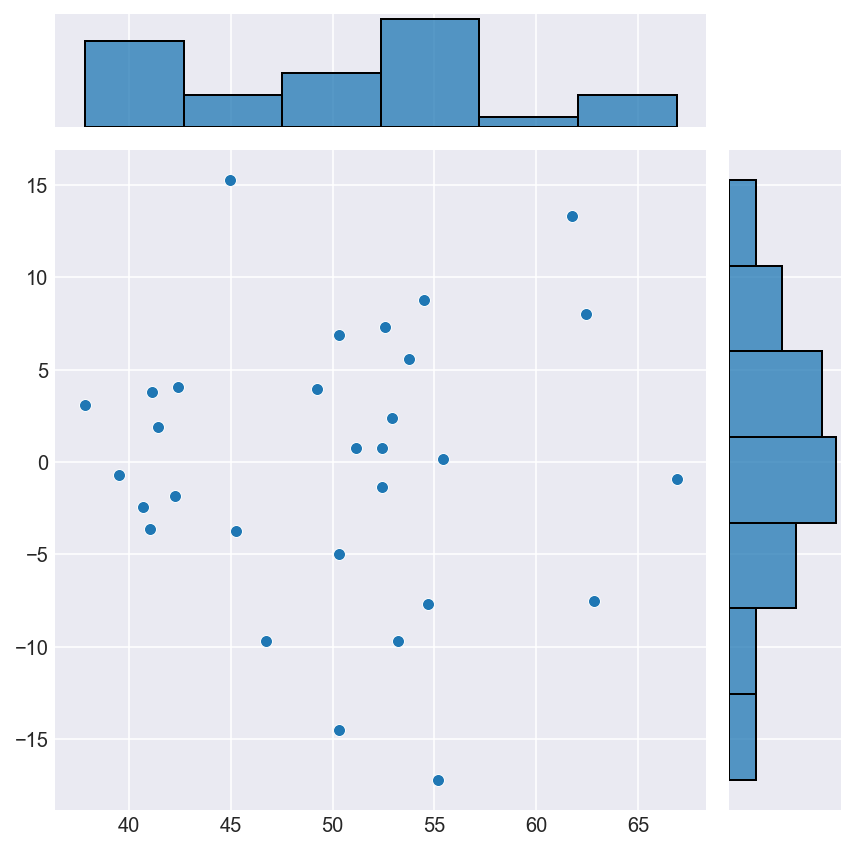

In [48]:
# 잔차의 산포도: x축 적합도, y축 잔차
sns.jointplot(lm_model.fittedvalues,resid)

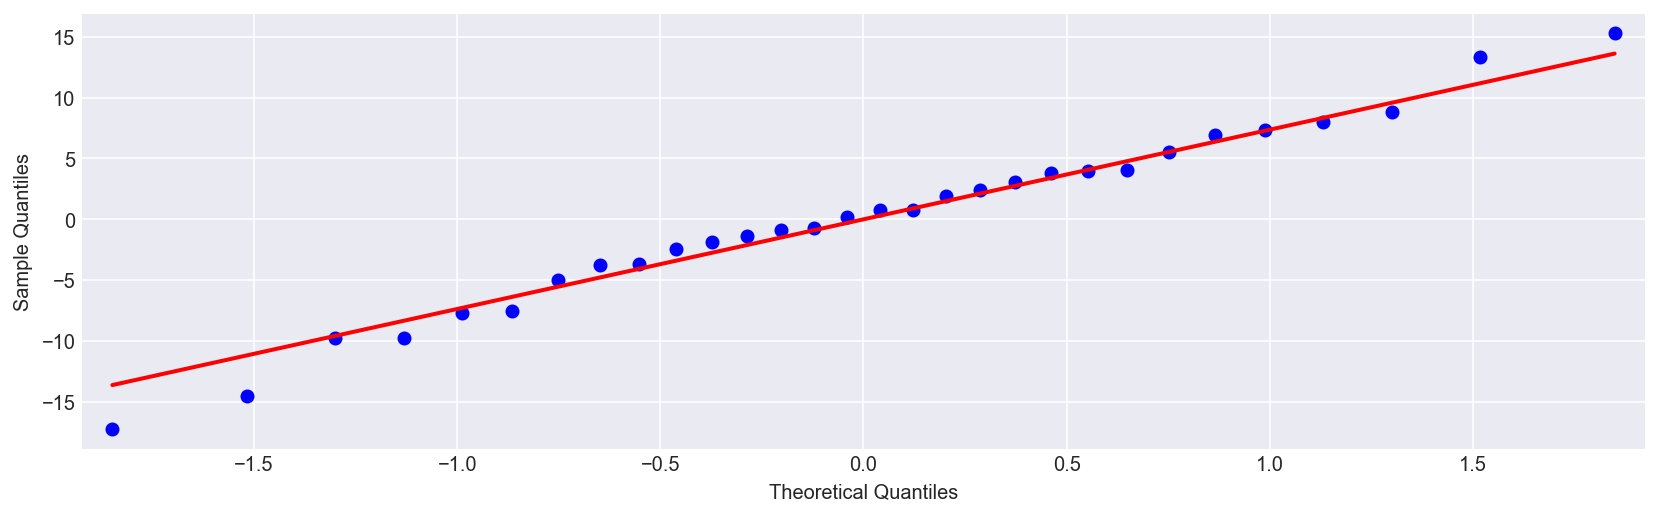

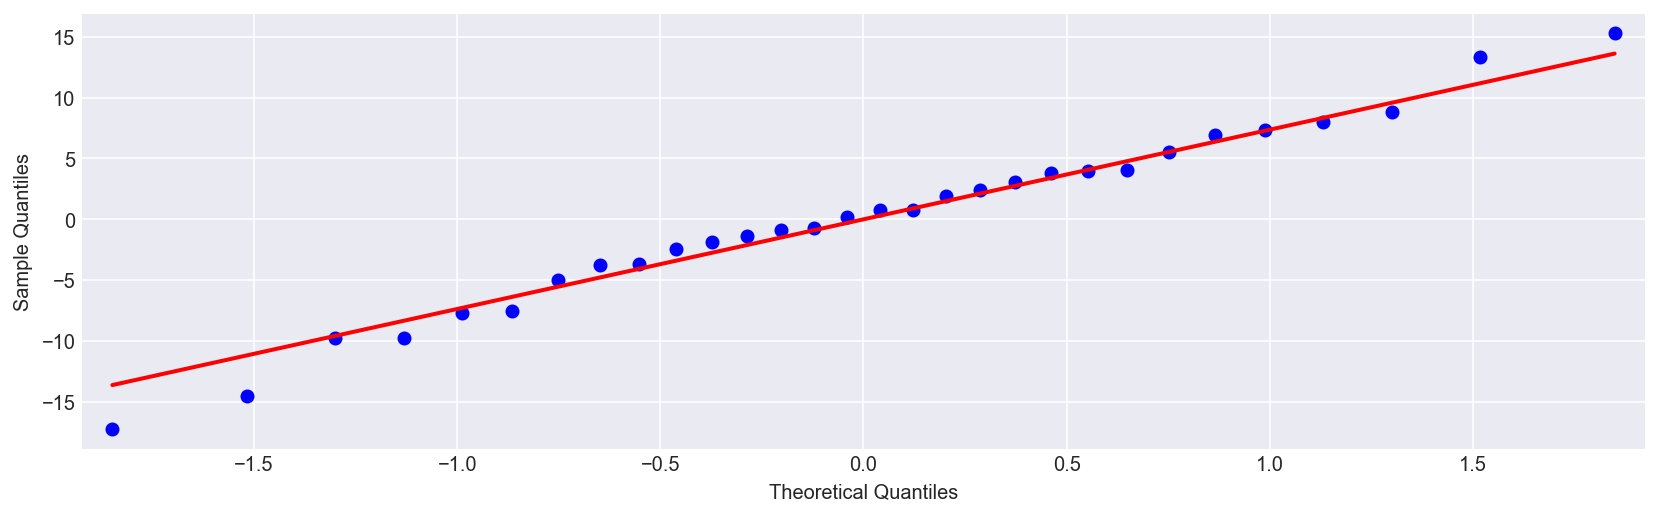

In [49]:
# Q-Q 플롯: 이론상의 분위점과 실제 데이터의 분위점을 산포도 그래프로 그린 것
sm.qqplot(resid,line='s')

# QQ 플롯이 이렇게 일치하면 정규성이 있다고 본다 

 분산분석은 모델로도 쓰고 분석으로도 쓴다 
분석 :: 독립변수 범주형 / 종속변수 연속형 -- 범주별로 해서...
        분석 :
        공장에서 A장비와 B장비를 통해서 생산된 제품의 불량률 (종속변수)  
        A장비 B장비 (독립분석)
        A장비 불량률 0.06/ B장비 불량률 0.02
        
T검정과 다른점 : 평균값 차이 검정은 t검정을 이용하지만, 세 개 이상의 수준간의 평균값 차이 검정은 분산분석을 사용한다.


### 분산분석
- 정규선형모델 중에서 독립변수가 카테고리형 변수인 모델을 분산분석 모델이라고 하며 분산분석은 또한 검정방법의 이름이기도 함
- 분산분석은 정규선형모델에서 폭넓게 이용되는 검정방법으로 평균값의 차이를 거정하는 방법
- 평균갑의 차이 검정은  t검정을 이용하지만 세 개 이상의 수준간의 평균값 차이 검정은 분산분석을 사용
- 모집단이 정규분포를 따르는 데이터에 대해서만 적용, 또한 수준 사이의 분산값이 다르지 않다는 조건도 충족
- 자료를 분석하는 데 자료의 분산을 활용하는 통계기법으로 실험이나 관측에서 독립변수와 종속변수의 관계를 분석하는데 활용
- "온도는 생산성에 영향을 주는가?", "유통되는 약들이 당뇨에 미치는 효과는 같은가?" 와 같은 과제를 분석함
- 여러 정신과 환자들이 상담, 명상, 그리고 바이오 피드백 세 가지 치료법을 시도하려고 한다. 이중에서 다른 치료법보다 나은 치료 방법이 있는가?
- 한 제조업체는 전구를 만드는 두 가지 공법이 있다. 한 방법이 다른 방법보다 나은가?
- 서로 다른 두 학교의 학생들이 같은 시험을 치르려고 한다. 이 때 한 학교가 다른 학교보다 성적이 더 나은가?

### 분산분석의 직감적 사고방식 : F비
- 귀무가설 : 수준 간의 평균값에 차이가 없다. <->  대립가설 : 수준간의 평균값에 차이가 있다.
- 수준이란 날씨, 물고기 종류 등과 같은 카테고리 변수를 의미
- 분산분석에서는 데이터의 변동을 오차와 효과로 분리하여 F비 계산
- F비 = 효과의 분산 크기/ 오차의 분산 크기
- 효과의 크기를 군간 변동, 오차의 크기를 군내변동이라 하고 데이터의 분산을 2개의 변동으로 나눈 뒤 그 비율을 최한 것을 통계량으로 사용하여 검정 시행
- 분산의 비율을 취한 통계량으로 검정을 시행하므로 분산분석(ANOVA)이라고 부름
- F비가 크며 ㄴ오차에 비해 효과의 영향이 클 것 이라고 판단
- F분포의 누적분포함수를 사용해서 p값을 계산하고 p값이 0.05이하가 되면 귀무가설을 기각한다.

In [50]:
# 샘플 데이터
weather = [
    "cloudy","cloudy",
    "rainy","rainy",
    "sunny","sunny"
]

beer=[6,8,2,4,10,12]
w_beer= pd.DataFrame({
    "beer":beer,
    "weather":weather
})
w_beer

,beer,weather
0,6,cloudy
1,8,cloudy
2,2,rainy
3,4,rainy
4,10,sunny
5,12,sunny


<AxesSubplot:xlabel='weather', ylabel='beer'>

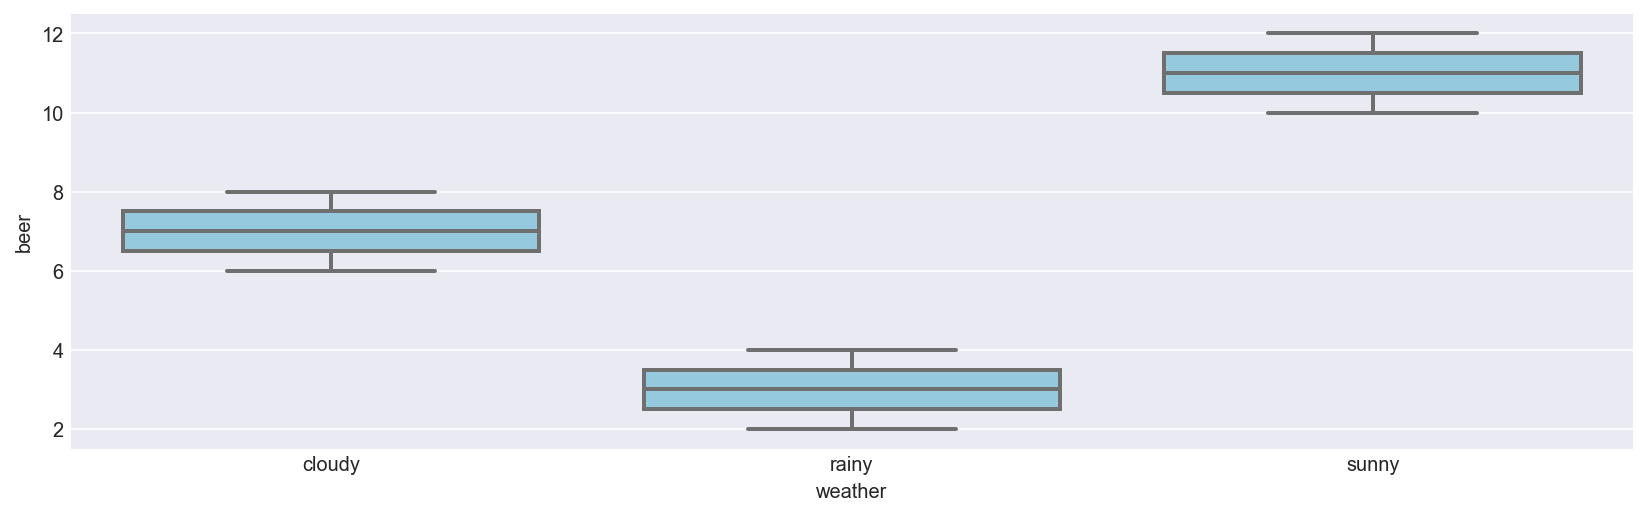

In [51]:
# boxplot 
sns.boxplot(x='weather',y='beer',
           data=w_beer, color='skyblue')

In [52]:
# 날씨별 매상의 평균치
w_beer.groupby('weather').mean()

,beer
weather,
cloudy,7
rainy,3
sunny,11


In [53]:
# 날씨에 의한 영향 : 2일씩 6일에 대한 날씨별 매상의 평균치 
effect= [7,7,3,3,11,11]

In [54]:
# effect의 흩어진 정도를 구함으로써 군간변동을 구할 수 있음 
mu_effect= np.mean(effect)
sq_model= np.sum((effect-mu_effect)**2)
sq_model

64.0

In [55]:
resid= w_beer.beer - effect 
resid 

0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64

In [56]:
# 군내변동: 오차의 평균값은 0

sq_resid= np.sum(resid**2)
sq_resid

6

In [57]:
df_model = 2 # 군간변동의 자유도 (수준의 종류 수에 따라 좌우: 수준(3) - 1)
df_resid = 3 # 군내변동의 자유도(샘플사이즈와 수준의 종류 수 : 샘플(6)- 수준(3))

In [58]:
# 군간 평균제곱(분산)
v_model= sq_model/df_model
v_model

32.0

In [59]:
# 군내 평균제곱(분산)
v_resid= sq_resid / df_resid
v_resid

2.0

In [60]:
# F비: 군간 분산과 군내 분산의 비 
f_ratio = v_model / v_resid
f_ratio

16.0

In [61]:
# p값아 0.05보다 작으므로 날씨에 의해 매상이 유의미하게 변화한다고 판단 
1 - stats.f.cdf(x=f_ratio, dfn=df_model, dfd=df_resid)

0.02509457330439091

In [62]:
anova_model = smf.ols('beer~weather',
                     data=w_beer).fit()

In [63]:
# 분산분석표 : 군간, 군내편차제곱함, 자유도, F비, p값 
sm.stats.anova_lm(anova_model,typ=2)

,sum_sq,df,F,PR(>F)
weather,64.0,2.0,16.0,0.025095
Residual,6.0,3.0,NaN,NaN


In [64]:
anova_model.params


Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

In [65]:
# 독립변수가 여럿인 모델
import pandas as pd
sales= pd.read_csv('dataset/7_3_lmm.csv')
sales.head(3)

,humidity,price,sales,temperature,weather
0,29.5,290,229.7,17.8,rainy
1,38.1,290,206.1,26.1,rainy
2,31.5,290,202.5,22.0,rainy


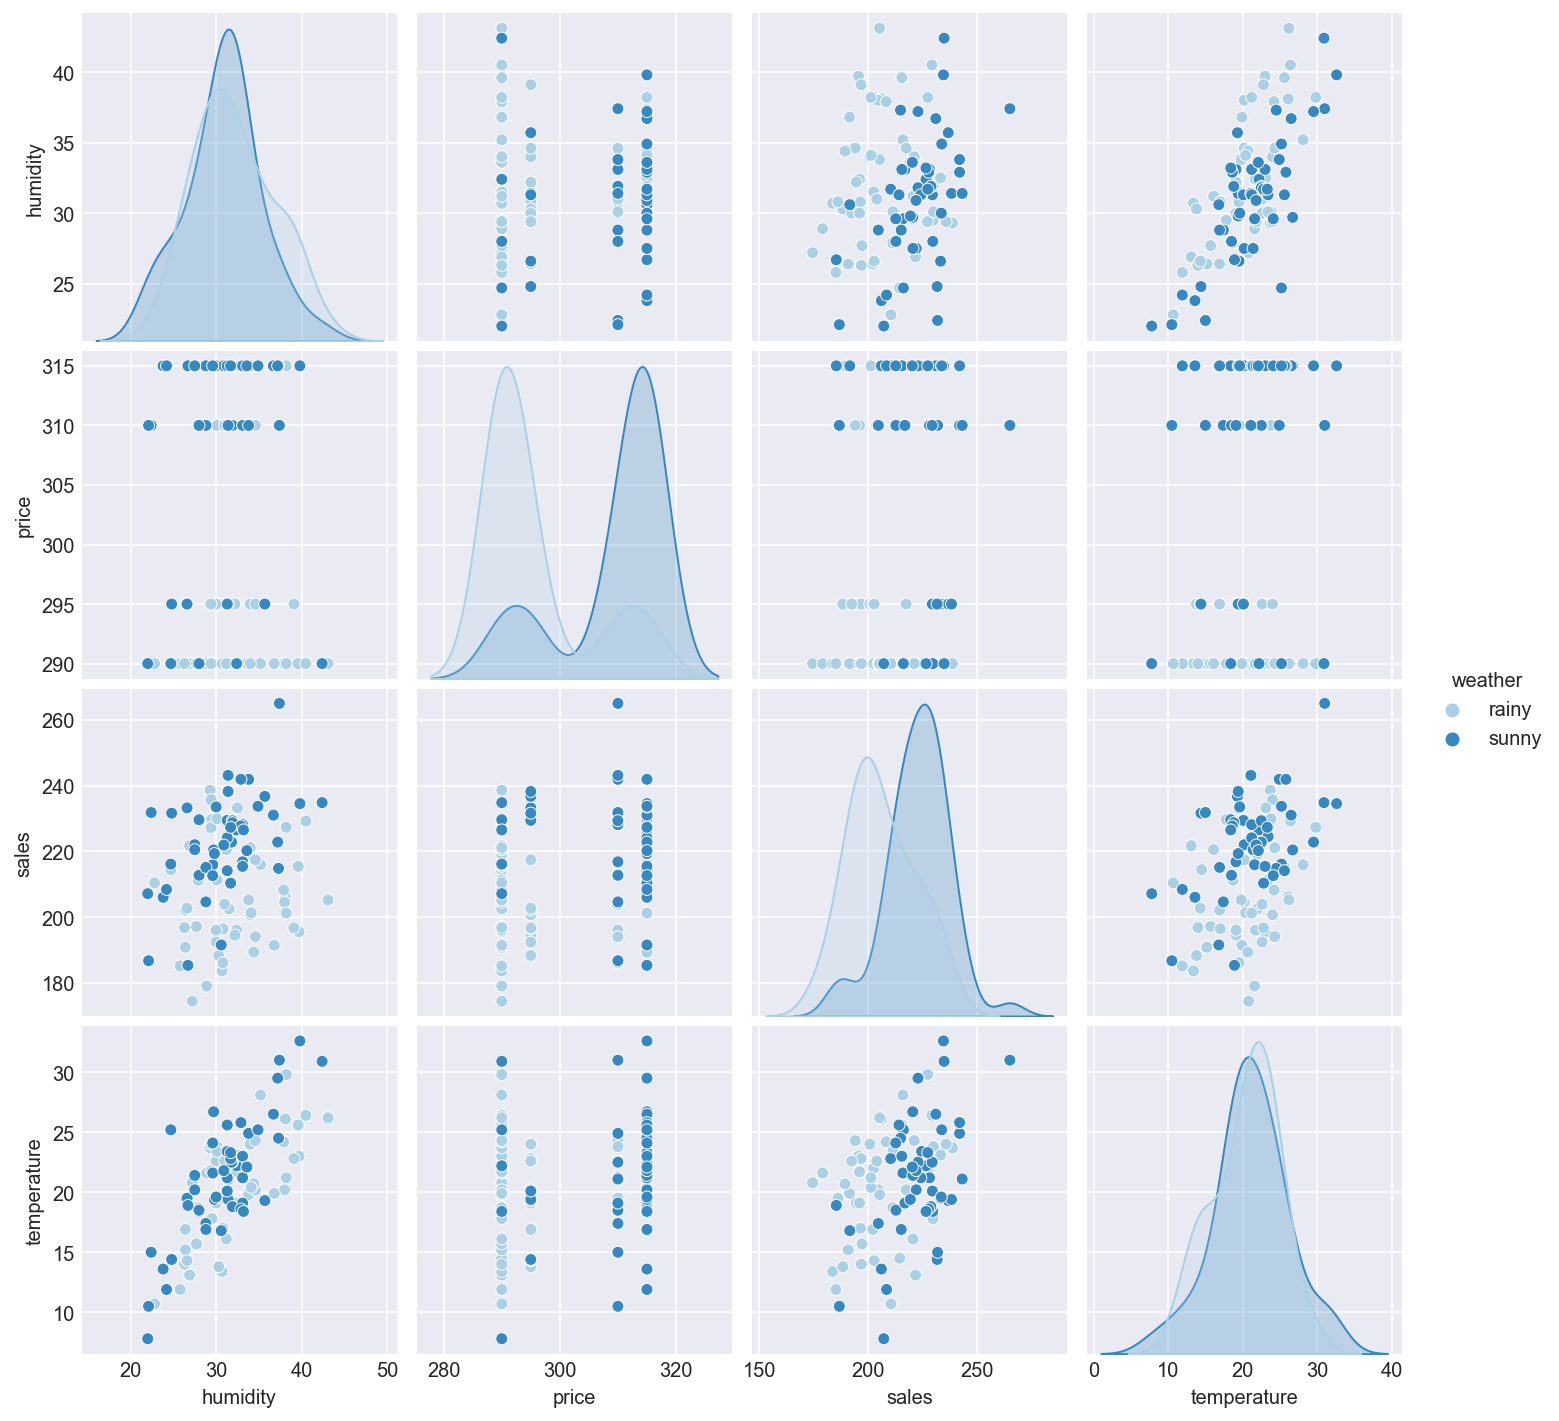

In [66]:
import seaborn as sns
sns.pairplot(data= sales, hue='weather',palette='Blues')

In [67]:
lm= smf.ols('sales ~ price',sales).fit()

lm.params

Intercept    113.645406
price          0.332812
dtype: float64

In [68]:
# 잘못된 분석 : 가격이 오르면 매상도 증가 
sm.stats.anova_lm(lm,typ=2)

,sum_sq,df,F,PR(>F)
price,1398.392322,1.0,4.970685,0.028064
Residual,27570.133578,98.0,NaN,NaN


In [69]:
sales.groupby('weather').mean()

,humidity,price,sales,temperature
weather,,,,
rainy,32.126,295.5,205.924,20.422
sunny,30.852,309.5,222.718,21.102


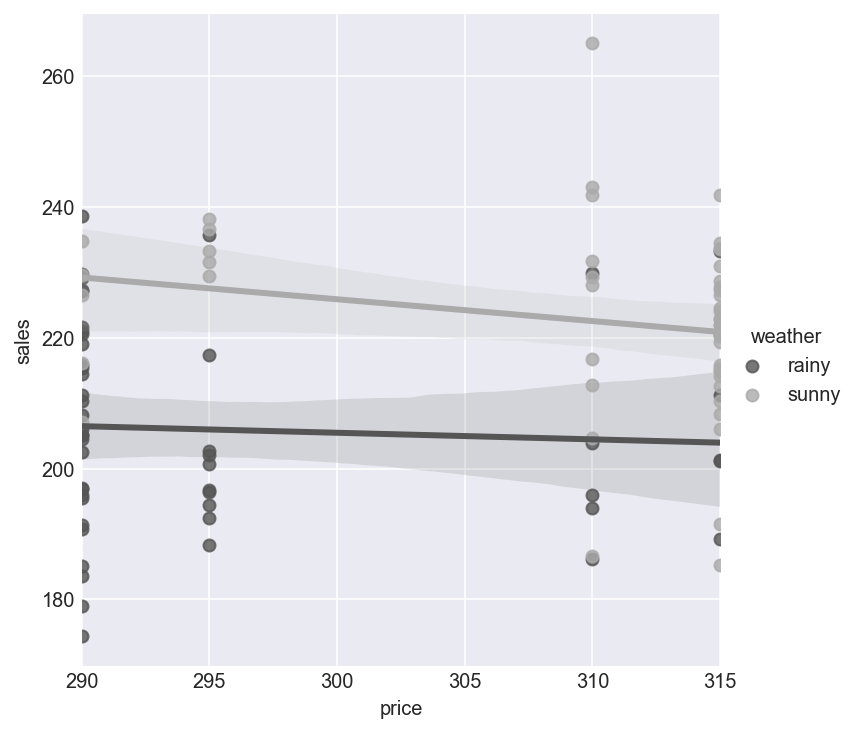

In [70]:
# 매상을 상품가격으로만 분석하여 문제의 소지 발생
# 날씨별로 보면 가격이 높아질 경우 매상이 줄어든다는 것을 알 수 있음

sns.lmplot(x='price',y='sales',data=sales,
          hue='weather', palette='gray')

In [71]:
# 독립변수가 4개인 모델 추정 
lm_sales= smf.ols(
"sales ~ weather + humidity + temperature + price", data= sales).fit()
lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

In [72]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [77]:
!jt -t   monokai

In [74]:
sm.stats.anova_lm(lm_sales).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,38.848,0.000
humidity,1.0,1779.601,1779.601,9.805,0.002
temperature,1.0,2076.845,2076.845,11.443,0.001
price,1.0,818.402,818.402,4.509,0.036
Residual,95.0,17242.717,181.502,NaN,NaN


In [75]:
lm_sales2= smf.ols(
"sales ~ weather + temperature + humidity + price", data=sales).fit()
sm.stats.anova_lm(lm_sales2).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,38.848,0.000
temperature,1.0,3814.779,3814.779,21.018,0.000
humidity,1.0,41.667,41.667,0.230,0.633
price,1.0,818.402,818.402,4.509,0.036
Residual,95.0,17242.717,181.502,NaN,NaN


In [ ]:
# 분산분석 대신 회귀계수의 t검정 수행하면 문제는 발생되지 않음 

In [78]:
lm_sales.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [79]:
lm_sales2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [81]:
# Type || ANOVA 
mod_full= smf.ols(
"sales ~weather + humidity + temperature + price", sales).fit()
sm.stats.anova_lm(mod_full,typ=2).round(3)

,sum_sq,df,F,PR(>F)
weather,5845.878,1.0,32.208,0.000
humidity,56.425,1.0,0.311,0.578
temperature,2378.017,1.0,13.102,0.000
price,818.402,1.0,4.509,0.036
Residual,17242.717,95.0,NaN,NaN


In [82]:
# 습도는 기온과 강한 상관관계가 있으며 , 기온이라는 독립변수가 포함되어있으면
# 습도는 매상에 영향을 끼친다고 볼 수 없음
mod_non_humi= smf.ols(
"sales ~ weather + temperature + price", sales).fit()
sm.stats.anova_lm(mod_non_humi,typ=2).round(3)

,sum_sq,df,F,PR(>F)
weather,6354.966,1.0,35.266,0.000
temperature,4254.736,1.0,23.611,0.000
price,803.644,1.0,4.460,0.037
Residual,17299.142,96.0,NaN,NaN


## 정리
Type I ANOVA 검정방법
- 복수의 독립변수를 가지는 경우 분산분석은 독립변수를 1개씩 늘려나가서 독립변수가 늘어남으로써 감소한 잔차제곱합의 크기를 기반으로 독립변수 효과의 크기(분산분석표에서 sum_sq)를 계산
- 이 방법은 독립변수를 추가하는 순서에 따라서 sum_sq 값의 크기가 크게 바뀌며 유의미한지 여부도 변할 수 있음
- 독립변수가 여러 개 있을 경우 이 방법을 사용하면 잘못된 결과를 얻을 가능성 있음



Type II ANOVA 검정방법
- 독립변수가 줄어들면서 증가하는 잔차제곱합의 크기에 기반해서 독립변수가 갖는 효과의 크기를 정량화 함
변수를 추가하는 순서를 바꾸어도 검정 결과는 달라지지 않음
- 독립변수간에 강한 상관관계가 있을 때 나타나는 문제가 다중공선성. 기온과 습도간의 상관관계
상관관계가 강한 변수 중 어느 한쪽을 제거
- 다중공선성이 있으면 추정된 계수의 해석이 어려워지고 검정에서 얻은 p값 역시 해석이 어려움
- 리지회귀등을 이용함으로써 이런 문제를 완화할 수 있음

In [ ]:
귀무가설( 사람들이 일반적으로 맞다고 생각하는 가설)
